In [13]:
# Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Setting up WD
os.chdir(r"C:\Users\sanne\OneDrive\Documenten\Lund Uni\Advanced machine learning\ProjectDivorce")

# Loading data
data = pd.read_csv("divorce.csv")

For the course of the study’s analysis, survey data was used. There were 170 participants of which 84 were divorced and 86 were married. There were 84 males and 86 females. The research data was collected using the face-to-face interview technique and via Google Drive containing 55 questions.  The 55th variable is a dummy variable, indicating whether the person is married or divorced. The remaining 54 questions have an ordinal output, ranging from 0 to 4 in which 4 represents; “strongly agree”. These 54 questions concern questions related to how the relationship is perceived.  The survey was taken in Turkey in 2019 (Yontem et al, 2019). The data is publicly available on; [Kaggle Dataset](https://www.kaggle.com/datasets/csafrit2/predicting-divorce/data)

## Descriptive analyses

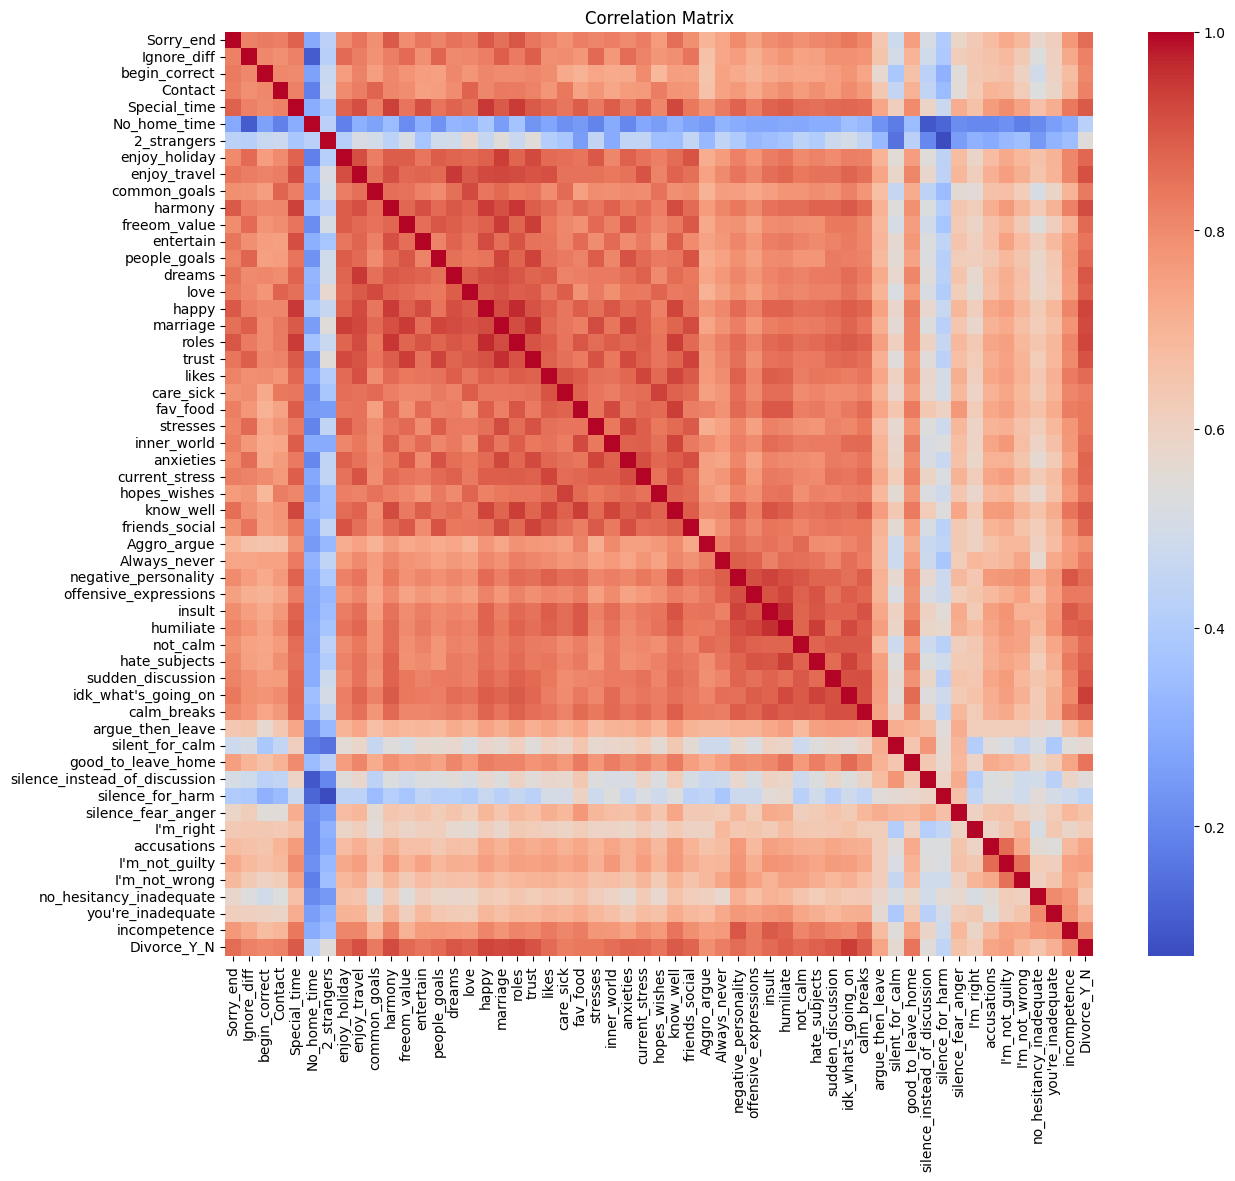

In [123]:
## Descriptive Analyses 
correlation_matrix = data.corr()

# Visualize correlation with a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

To explore the relationships between the variables, a correlation plot was created.

The results align with our initial assumptions: most variables show strong correlations, as indicated by the deep blue hues in the plot. Notably, two variables—"stranger time" and "no home time"—exhibit weaker correlations, represented by lighter blue shades. Upon quantifying the correlations, we identified 41 variables with averagecorrelations exceeding 0.7 and 11 variables below this threshold. The weakest average correlation, at 0.26, corresponds to "no home time."

These findings confirm our expectations, demonstrating that the dataset is predominantly characterized by strong inter-variable correlations.

In [124]:

# Compute the mean correlation for each variable, excluding self-correlations (diagonal values)
mean_correlations = correlation_matrix.apply(lambda x: (x.sum() - x[x.name]) / (len(x) - 1))

# Display variables with mean correlations less than 0.7
low_corr_var = mean_correlations[mean_correlations < 0.7]

# Display variables with mean correlations greater than 0.7
high_corr_var = mean_correlations[mean_correlations > 0.7]

print(f"Number of low correlated variables: {low_corr_var.count()}")
print(f"Number of highly correlated variables: {high_corr_var.count()}")
print(f"Weakest corraleted variable: {mean_correlations.idxmin()} with value: {mean_correlations.min()}")

Number of low correlated variables: 14
Number of highly correlated variables: 41
Weakest corraleted variable: No_home_time with value: 0.2629620065293393


# Research question
How do Support Vector Machines and Bayesian logistic regression compare to existing neural network and Random Forest methods in predicting divorce based on marital satisfaction, communication patterns, and compatibility?

# SVM why appropiate?
- SVM (with an RBF kernel) is well-suited for datasets with correlated features, as it projects the data into a higher-dimensional space where correlations are less problematic.
- SVM is particularly effective for binary classification tasks, like your Divorce_Y/N variable, and aims to find a decision boundary that maximizes the margin between classes.
- SVMs perform well even with a large number of predictors,

# Why Bayesian?
- Changing this to Bayesian NN
- Bayesian logistic regression with a Gaussian or Laplace prior effectively regularizes coefficients and prevents overfitting caused by multicollinearity.
- Unlike SVM, Bayesian regression allows for interpreting the posterior distributions of coefficients. This is valuable for understanding which factors (e.g., communication patterns or compatibility) contribute most to predicting divorce.
- If you have prior knowledge about which variables might be more influential, Bayesian regression allows you to incorporate this information through the prior distribution.
- (Decide on prior la place for lasso and Gaussian for ridge)We could choose La place for increased interpetability 

Strengths of Combining the Two Approaches
You can leverage the strengths of both models:

Use Bayesian regression to identify the most important predictors and interpret their relationships with divorce.
Use SVM (with an RBF kernel) as a benchmark model to test the predictive performance of your dataset in a purely machine-learning-based framework.

# Project Outline/to do

## Model comparison
- Train Bayesian logistic regression and SVM on dataset
- Compare models using metrics like accuracy, precision, recall, F1 score, and AUC ROC

## Interpretation
- Use Bayesian NN to explain the relationships between predictors and divorce outcomes.
- Use SVM to benchmark the predictive performance and validate the findings.

# NN

In [125]:


# Splitting data
X = data.drop(columns= ['Divorce_Y_N'])
y = data['Divorce_Y_N']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [126]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Initialize first moodel
model1 = keras.Sequential()

# add input layer
model1.add(Input(shape=(X_train.shape[1],)))

# Add first hidden layer with 30 hidden units
model1.add(Dense(30, activation='relu'))

# Add second hidden layer with 15 hidden units
model1.add(Dense(15, activation='relu'))

# Add output layer Binary classification thus sigmoid as activation function
model1.add(Dense(1, activation='sigmoid'))

In [127]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.callbacks import EarlyStopping

# Model with binarycrossentropy as loss Adam as optimzer and learning rate of 00003
model1.compile(optimizer= Adam(learning_rate=0.00003),
               loss=BinaryCrossentropy(),
               metrics=['accuracy'])

# Define the early stopping monitor
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Fit model here
model1_fit = model1.fit(
    X_train, y_train,
    validation_split=0.25,
    epochs=250,
    batch_size=256,
    callbacks=[early_stopping_monitor]
)

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - accuracy: 0.5053 - loss: 2.8338 - val_accuracy: 0.5625 - val_loss: 2.8606
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5053 - loss: 2.8223 - val_accuracy: 0.5625 - val_loss: 2.8494
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5053 - loss: 2.8107 - val_accuracy: 0.5625 - val_loss: 2.8382
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5053 - loss: 2.7992 - val_accuracy: 0.5625 - val_loss: 2.8270
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5053 - loss: 2.7877 - val_accuracy: 0.5625 - val_loss: 2.8158
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5053 - loss: 2.7762 - val_accuracy: 0.5625 - val_loss: 2.8046
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5053 - loss: 2.7647 - val_accuracy: 0.5625 - val_loss: 2.7934
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5053 - loss: 2.7532 - val_accuracy: 0.5625 - val_loss

In [128]:
stopped_epoch = len(model1_fit.history['loss'])

when_earlystop_1d = f"The training stopped after {stopped_epoch} epochs."

In [129]:
res_model1 = model1.evaluate(X_test, y_test)
print(res_model1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4714 - loss: 0.9398 
[0.8946187496185303, 0.4883720874786377]


In [130]:
import tensorflow_probability as tfp
print(tfp.__version__)

0.25.0


In [131]:
import tensorflow_probability as tfp
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("TensorFlow Probability version:", tfp.__version__)

TensorFlow version: 2.18.0
TensorFlow Probability version: 0.25.0


In [132]:
X_train.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_instead_of_discussion,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence
146,2,1,1,0,0,1,0,0,0,0,...,3,1,1,3,0,0,0,0,0,0
137,0,0,1,0,0,0,0,1,1,0,...,3,3,3,3,0,1,3,3,3,1
97,0,0,0,0,0,0,0,0,0,0,...,4,2,1,1,0,0,0,1,0,0
65,3,3,3,2,3,1,1,3,3,2,...,4,3,4,3,4,4,3,4,3,4
36,4,3,3,3,4,1,0,3,3,3,...,4,4,3,4,4,3,3,4,4,3


# Bayesian Neural Network 

In [133]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
# Assuming X_train and y_train are NumPy arrays
X_train = np.array(X_train)  # Ensure it's a NumPy array
y_train = np.array(y_train)  # Ensure it's a NumPy array

# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()  # Convert features to float tensors
y_train_tensor = torch.from_numpy(y_train).long()   # Convert target to long tensors for classification

X_train_tensor.shape


torch.Size([127, 54])

In [135]:
y_train_tensor.shape

torch.Size([127])

In [136]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=54, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=3),
)

In [137]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [138]:
kl_weight = 0.1

In [224]:
# Parameters for early stopping
patience = 10  # Number of epochs to wait for improvement
best_loss = float('inf')
counter = 0

# Training loop with early stopping
for step in range(3000):
    # Forward pass
    pre = model(X_train_tensor)
    ce = ce_loss(pre, y_train_tensor)
    kl = kl_loss(model)
    cost = ce + kl_weight * kl

    # Backpropagation and optimization
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # Accuracy calculation
    _, predicted = torch.max(pre.data, 1)
    total = y_train_tensor.size(0)
    correct = (predicted == y_train_tensor).sum()

    # Validation loss (use a validation dataset)
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_pre = model(X_test_tensor)
        val_loss = ce_loss(val_pre, y_test_tensor).item()
    model.train()  # Switch back to training mode

    # Early stopping logic
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0  # Reset counter if improvement is seen
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping triggered at step {step}")
            break

    # Print metrics
    print(f'Step: {step}, Accuracy: {100 * float(correct) / total:.2f}%, '
          f'CE: {ce.item():.2f}, KL: {kl.item():.2f}, Val Loss: {val_loss:.2f}')

Step: 0, Accuracy: 100.00%, CE: 0.00, KL: 0.15, Val Loss: 0.00
Step: 1, Accuracy: 100.00%, CE: 0.00, KL: 0.15, Val Loss: 0.00
Step: 2, Accuracy: 100.00%, CE: 0.00, KL: 0.15, Val Loss: 0.05
Step: 3, Accuracy: 100.00%, CE: 0.01, KL: 0.15, Val Loss: 0.03
Step: 4, Accuracy: 100.00%, CE: 0.00, KL: 0.15, Val Loss: 0.00
Step: 5, Accuracy: 100.00%, CE: 0.00, KL: 0.15, Val Loss: 0.00
Step: 6, Accuracy: 100.00%, CE: 0.00, KL: 0.15, Val Loss: 0.06
Step: 7, Accuracy: 100.00%, CE: 0.00, KL: 0.14, Val Loss: 0.00
Step: 8, Accuracy: 100.00%, CE: 0.00, KL: 0.14, Val Loss: 0.00
Step: 9, Accuracy: 100.00%, CE: 0.00, KL: 0.14, Val Loss: 0.04
Step: 10, Accuracy: 100.00%, CE: 0.00, KL: 0.14, Val Loss: 0.05
Step: 11, Accuracy: 100.00%, CE: 0.00, KL: 0.14, Val Loss: 0.00
Step: 12, Accuracy: 100.00%, CE: 0.00, KL: 0.14, Val Loss: 0.00
Step: 13, Accuracy: 100.00%, CE: 0.00, KL: 0.14, Val Loss: 0.01
Step: 14, Accuracy: 100.00%, CE: 0.00, KL: 0.14, Val Loss: 0.01
Step: 15, Accuracy: 100.00%, CE: 0.00, KL: 0.14, V

In [230]:
torch.manual_seed(44)
np.random.seed(44)
# Assuming X_train and y_train are NumPy arrays
X_test = np.array(X_test)  # Ensure it's a NumPy array
y_test = np.array(y_test)  # Ensure it's a NumPy array

# Convert X_test and y_test to PyTorch tensors if not already
X_test_tensor = torch.from_numpy(X_test).float()  # Ensure features are floats
y_test_tensor = torch.from_numpy(y_test).long()   # Ensure labels are long (integers)

# Make Predictions
with torch.no_grad():  # No gradient calculation needed for evaluation
    predictions = model(X_test_tensor)
    _, predicted_classes = torch.max(predictions, 1)  # Get predicted class indices

# Calculate Accuracy
total_test_samples = y_test_tensor.size(0)
correct_predictions = (predicted_classes == y_test_tensor).sum().item()
accuracy = 100 * correct_predictions / total_test_samples

# Print Results
print(f"Test Accuracy: {accuracy:.2f}%")

from sklearn.metrics import classification_report

# Generate Classification Report
print(classification_report(y_test_tensor.numpy(), predicted_classes.numpy()))

Test Accuracy: 97.67%
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.96      0.98        23

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



Fold 1/5
Early stopping on epoch 20
Fold 1 Accuracy: 0.2000, Best Validation Loss: 1.0436
Fold 2/5
Early stopping on epoch 22
Fold 2 Accuracy: 0.4500, Best Validation Loss: 1.0071
Fold 3/5
Early stopping on epoch 31
Fold 3 Accuracy: 0.2500, Best Validation Loss: 1.0652
Fold 4/5
Early stopping on epoch 13
Fold 4 Accuracy: 0.3500, Best Validation Loss: 1.0943
Fold 5/5
Early stopping on epoch 32
Fold 5 Accuracy: 0.3000, Best Validation Loss: 0.9914
Average Accuracy: 0.3100 ± 0.0860
Average Validation Loss: 1.0403 ± 0.0375


# SVM

Kernel choice Hyperparameter ;
- Linear
- Polynomial
- Radial
- Sigmoid
cost argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the C argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin. Notice that this C is different from that in equation

SVM specifically usefull because we are predicting only two classes 
Concerns;
- High dimensional data set (170 rows, 55 variables)
- - Features are already standardized


In [20]:
from matplotlib.pyplot import cm
from ISLP import confusion_table
from sklearn.svm import SVC
import sklearn.model_selection as skm
from ISLP.svm import plot as plot_svm
from matplotlib.pyplot import subplots

In [30]:
# Setting up WD
os.chdir(r"C:\Users\sanne\OneDrive\Documenten\Lund Uni\Advanced machine learning\ProjectDivorce")

# Loading data
data = pd.read_csv("divorce.csv")
X = data.drop(columns= ['Divorce_Y_N'])
y = data['Divorce_Y_N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
svm_linear = SVC(C=0.01, kernel='rbf')
svm_linear.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = svm_linear.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.46511627906976744
Confusion Matrix:
 [[20  0]
 [23  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.63        20
           1       0.00      0.00      0.00        23

    accuracy                           0.47        43
   macro avg       0.23      0.50      0.32        43
weighted avg       0.22      0.47      0.30        43



C:\Users\sanne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification


# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Grid search
grid = GridSearchCV(SVC(), param_grid, cv=5, verbose=2)
grid.fit(X, y)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Extract and inspect the results for the linear kernel
linear_results = results[results['param_kernel'] == 'linear']
print(linear_results[['param_C', 'mean_test_score']])

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.0

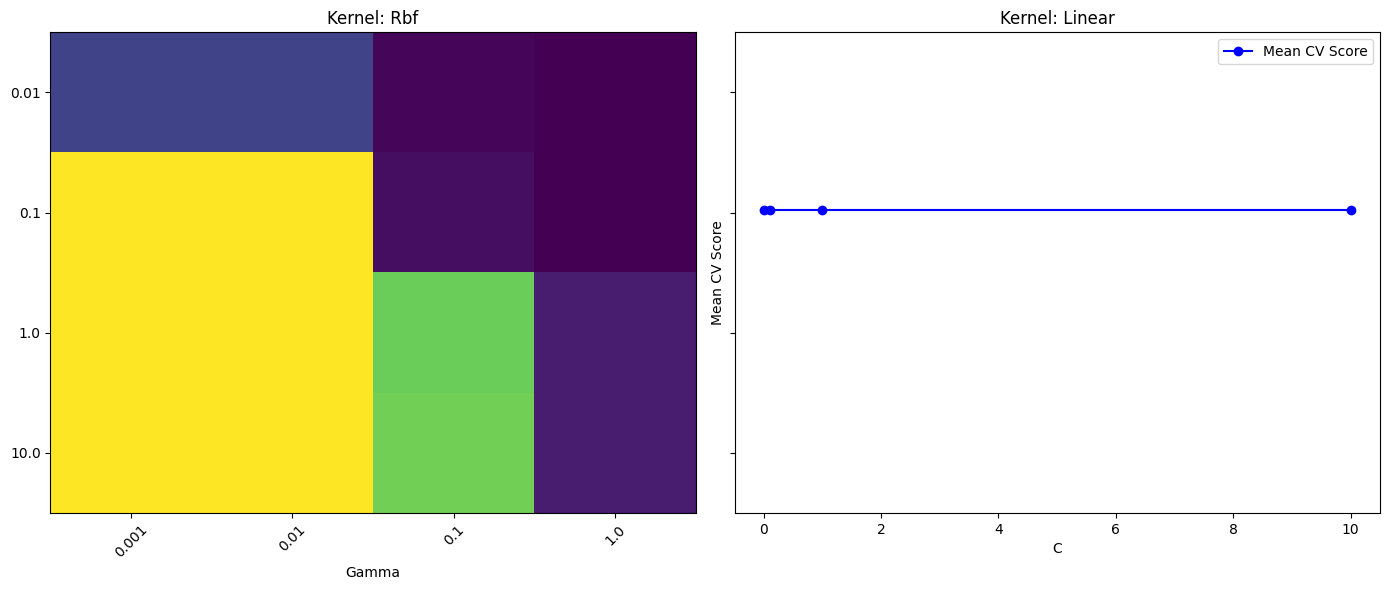

Best Parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best CV Score: 0.9764705882352942


In [48]:

# Step 4: Extract the results into a DataFrame
results = pd.DataFrame(grid.cv_results_)

# Step 5: Pivot the results to create a heatmap-friendly format
pivot_table = results.pivot_table(values='mean_test_score', 
                                  index='param_C', 
                                  columns=['param_gamma', 'param_kernel'])

# Step 6 (Updated): Visualize the results with heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
kernels = ['rbf', 'linear']

for i, kernel in enumerate(kernels):
    if kernel == 'rbf':
        # For RBF kernel, show C vs Gamma
        kernel_data = pivot_table.xs(kernel, level='param_kernel', axis=1)
        im = axes[i].imshow(kernel_data, cmap='viridis', interpolation='nearest', aspect='auto')
        axes[i].set_title(f'Kernel: {kernel.capitalize()}')
        axes[i].set_xlabel('Gamma')
        axes[i].set_xticks(range(len(kernel_data.columns)))
        axes[i].set_xticklabels(kernel_data.columns, rotation=45)
    elif kernel == 'linear':
        # For Linear kernel, show only C
        kernel_data = pivot_table.xs(kernel, level='param_kernel', axis=1).mean(axis=1)
        axes[i].plot(kernel_data.index, kernel_data.values, marker='o', color='blue', label='Mean CV Score')
        axes[i].set_title(f'Kernel: {kernel.capitalize()}')
        axes[i].set_xlabel('C')
        axes[i].set_ylabel('Mean CV Score')
        axes[i].legend()

    axes[i].set_yticks(range(len(kernel_data.index)))
    axes[i].set_yticklabels(kernel_data.index)

plt.tight_layout()
plt.show()

# Step 7: Display the best parameters and corresponding score
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

The fact that the linear Kernel outpreforms RBF is not surprusing. As we have seen in the Explanatory analyses our x variables are categorical and ordinal ranging from 0-5 therefore linear relationship was expexted. 

In [ ]:
Why Does C Have No Impact?
Linearly Separable Data:

If your data is inherently linearly separable, the SVM can perfectly classify the data regardless of the value of C. In such cases, the margin is already optimal, and changing C has no effect on the results.
Overwhelmingly Strong Features:

If one or more features dominate the classification task, the model might not be sensitive to changes in regularization strength (C).
Balanced Data and Perfect Hyperplane:

If the dataset is well-balanced and the linear kernel perfectly separates the classes, adjusting C won’t improve or degrade performance.
Feature Scaling Issues (Unlikely Here):

If features are not scaled properly, the effect of C might be diminished. However, this is less likely since the results are consistent.

The fact that linear outpreforms RBF is also already an indication that the data is linear sepretable. 

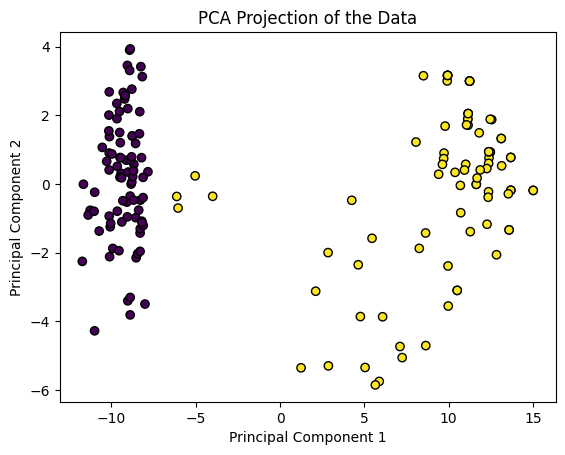

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
So we can clearly see that the data is linearly sepretable. Since the classes are already linearly seperateble adjusting C does not change the results. So visible no reason to implement RBF

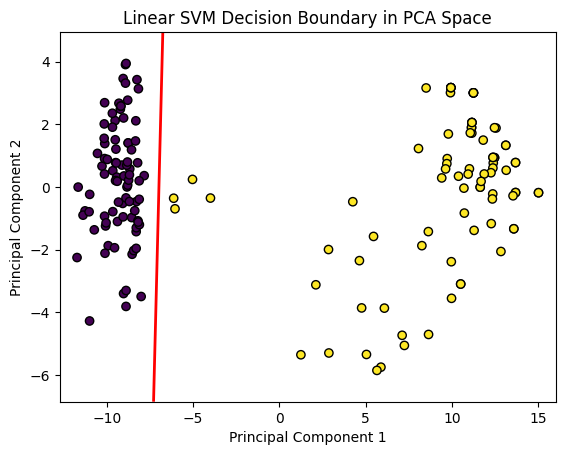

In [61]:
import numpy as np

# Fit linear SVM to the PCA-transformed data
svm_pca = SVC(kernel='linear', C=1.0)
svm_pca.fit(X_pca, y)

# Plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.title('Linear SVM Decision Boundary in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [63]:
# Step 3: Extract support vectors in the PCA-transformed space
support_vectors_pca = svm_pca.support_vectors_
support_indices = svm_pca.support_

# Step 4: Map support vectors back to the original feature space
# Inverse PCA transformation to return to the original space
support_vectors_original = pca.inverse_transform(support_vectors_pca)

# Step 5: Compute weights in the original space
# For a linear kernel, weights in PCA space can be mapped back to the original space
weights_pca = svm_pca.coef_  # Weights in PCA space
weights_original = np.dot(weights_pca, pca.components_)  # Map weights to original space

# Step 6: Create DataFrame to analyze support vectors in the original space
column_names = X.columns  # Use original column names if X is a DataFrame
support_analysis = pd.DataFrame(support_vectors_original, columns=column_names)

# Ensure y is a NumPy array for proper indexing
y_array = np.array(y)

# Add predicted class labels using the mapped class names
class_names = ['No', 'Yes']  # Adjust as per your actual class names
support_analysis['Predicted Class'] = [class_names[label] for label in y_array[support_indices]]

print("Support Vectors in Original Feature Space:")
print(support_analysis)

print("Weights for the Decision Boundary in Original Feature Space:")
print(pd.Series(weights_original.flatten(), index=column_names))

Support Vectors in Original Feature Space:
   Sorry_end  Ignore_diff  begin_correct   Contact  Special_time  \
0   1.082719     1.152808       1.430538  1.028023      0.353266   
1   0.590033     0.598344       0.786993  0.413569      0.312331   
2   0.935119     0.924451       1.110849  0.752794      0.591743   

   No_home_time  2_strangers  enjoy_holiday  enjoy_travel  common_goals  ...  \
0      0.563790     0.681640       0.648460      0.566343      1.229686  ...   
1      0.526643     0.117147       0.299016      0.272380      0.539116  ...   
2      0.581714     0.294595       0.613082      0.584439      0.884019  ...   

   silence_for_harm  silence_fear_anger  I'm_right  accusations  \
0          0.644996            0.258895   1.873533     1.023686   
1          2.107302            1.440073   2.144610     1.481801   
2          1.963122            1.427998   2.231899     1.605439   

   I'm_not_guilty  I'm_not_wrong  no_hesitancy_inadequate  you're_inadequate  \
0         1.16

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_linear, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [0.5 0.5 0.5 0.5 1. ]
Mean CV Accuracy: 0.6


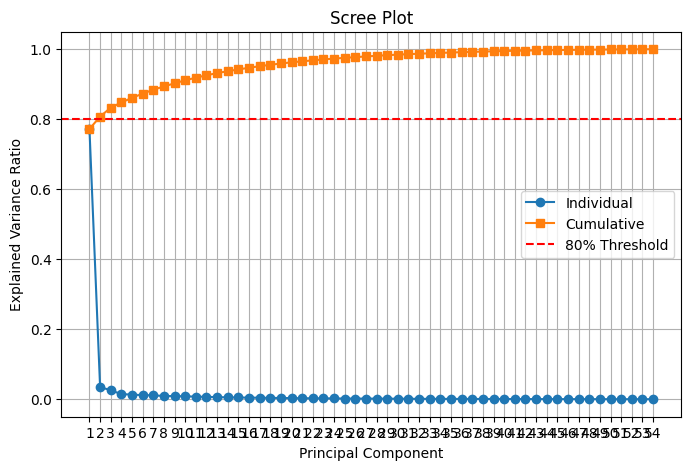

Explained Variance Ratios: [7.72218099e-01 3.52650469e-02 2.55399548e-02 1.48393767e-02
 1.32830836e-02 1.18486530e-02 1.12040872e-02 9.44361548e-03
 8.94488898e-03 8.57642670e-03 7.45450123e-03 6.97617983e-03
 6.17015209e-03 5.43748809e-03 5.09361561e-03 4.64729388e-03
 4.56363260e-03 3.88447352e-03 3.83004153e-03 3.30479038e-03
 2.96162303e-03 2.75481331e-03 2.56559662e-03 2.42356416e-03
 2.12057310e-03 2.01314353e-03 1.97980230e-03 1.85191826e-03
 1.72304047e-03 1.62216507e-03 1.36052486e-03 1.28775475e-03
 1.16058919e-03 1.11898341e-03 1.06880250e-03 9.97824066e-04
 9.26972532e-04 8.54326795e-04 8.17962377e-04 7.38949213e-04
 6.86193251e-04 5.62133408e-04 5.13912779e-04 5.01081561e-04
 4.57622766e-04 3.98570054e-04 3.65618742e-04 3.10520724e-04
 2.90968770e-04 2.67466660e-04 2.26326246e-04 2.10034646e-04
 1.87949252e-04 1.47270355e-04]
Cumulative Variance Ratios: [0.7722181  0.80748315 0.8330231  0.84786248 0.86114556 0.87299421
 0.8841983  0.89364192 0.90258681 0.91116323 0.918617

In [67]:
# Perform PCA
pca = PCA()
pca.fit(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Cumulative')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.legend()
plt.grid()
plt.show()


# Print PCA results
print("Explained Variance Ratios:", explained_variance_ratio)
print("Cumulative Variance Ratios:", cumulative_variance)